<a href="https://colab.research.google.com/github/sruthidamera/cs666student/blob/main/CS666_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

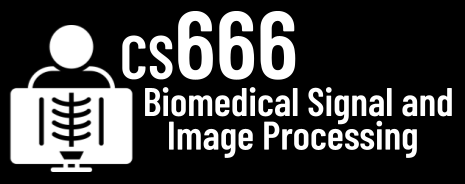
# Assignment 7

In [3]:
# NAME: Sruthi Damera

In [4]:
# In this assignment, we will explore the Imaging Data Commons,
# a data repository from the National Cancer Institute and then
# use the Boostlet API!

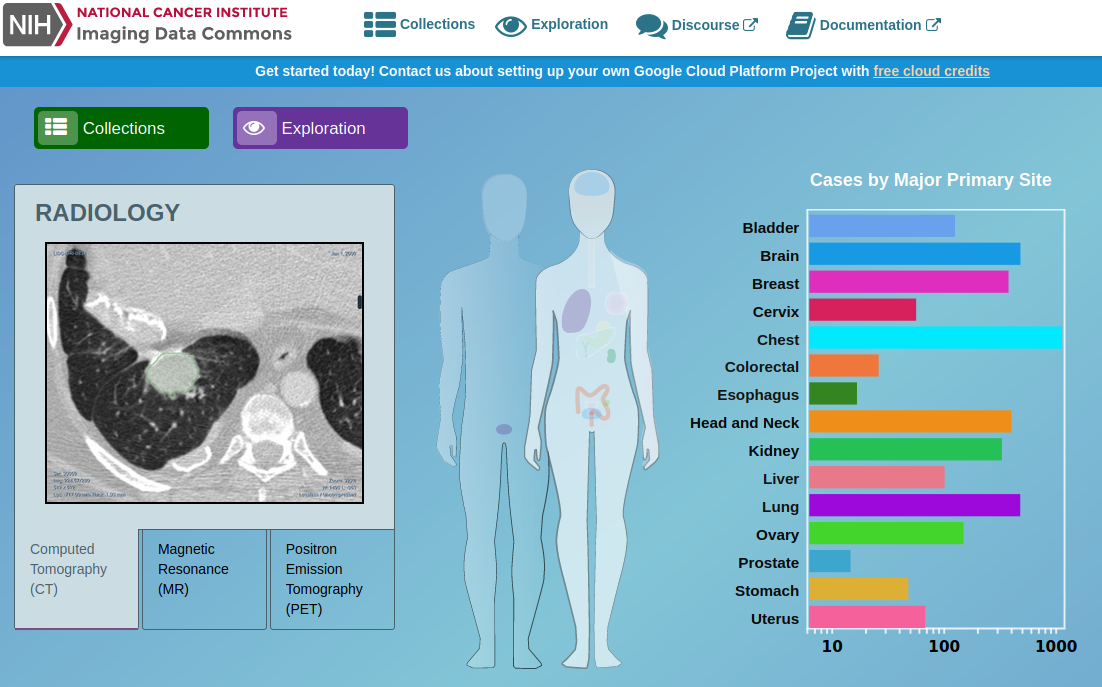

**Task 1**: Browse the IDC datasets and find a combined CT or MRI with PET! [15 Points]

In [5]:
#
# Visit https://portal.imaging.datacommons.cancer.gov/ and find a dataset
# that includes structural imaging such as CT or MRI combined with a PET scan.
#
# You can start by selecting the type of a cancer case such as Bladder, Brain etc.
# Hint: Use "Explore Images" and then the filter for modality to find e.g. PET scans.


In [6]:
# Open the integrated OHIF viewer to view the data.
#
# 1) Select a collection, then a case, then a study in the IDC interface.
# 2) To open the OHIF viewer, click on the view icon.
#

In [7]:
#
# TODO: REPLACE WITH DIRECT URL TO YOUR SELECTED CASE
# https://viewer.imaging.datacommons.cancer.gov/viewer/1.3.6.1.4.1.14519.5.2.1.7009.2403.229569618363242303725610936994
#

In [8]:
# 3) Paste a screenshot of the viewer after the data was loaded below.

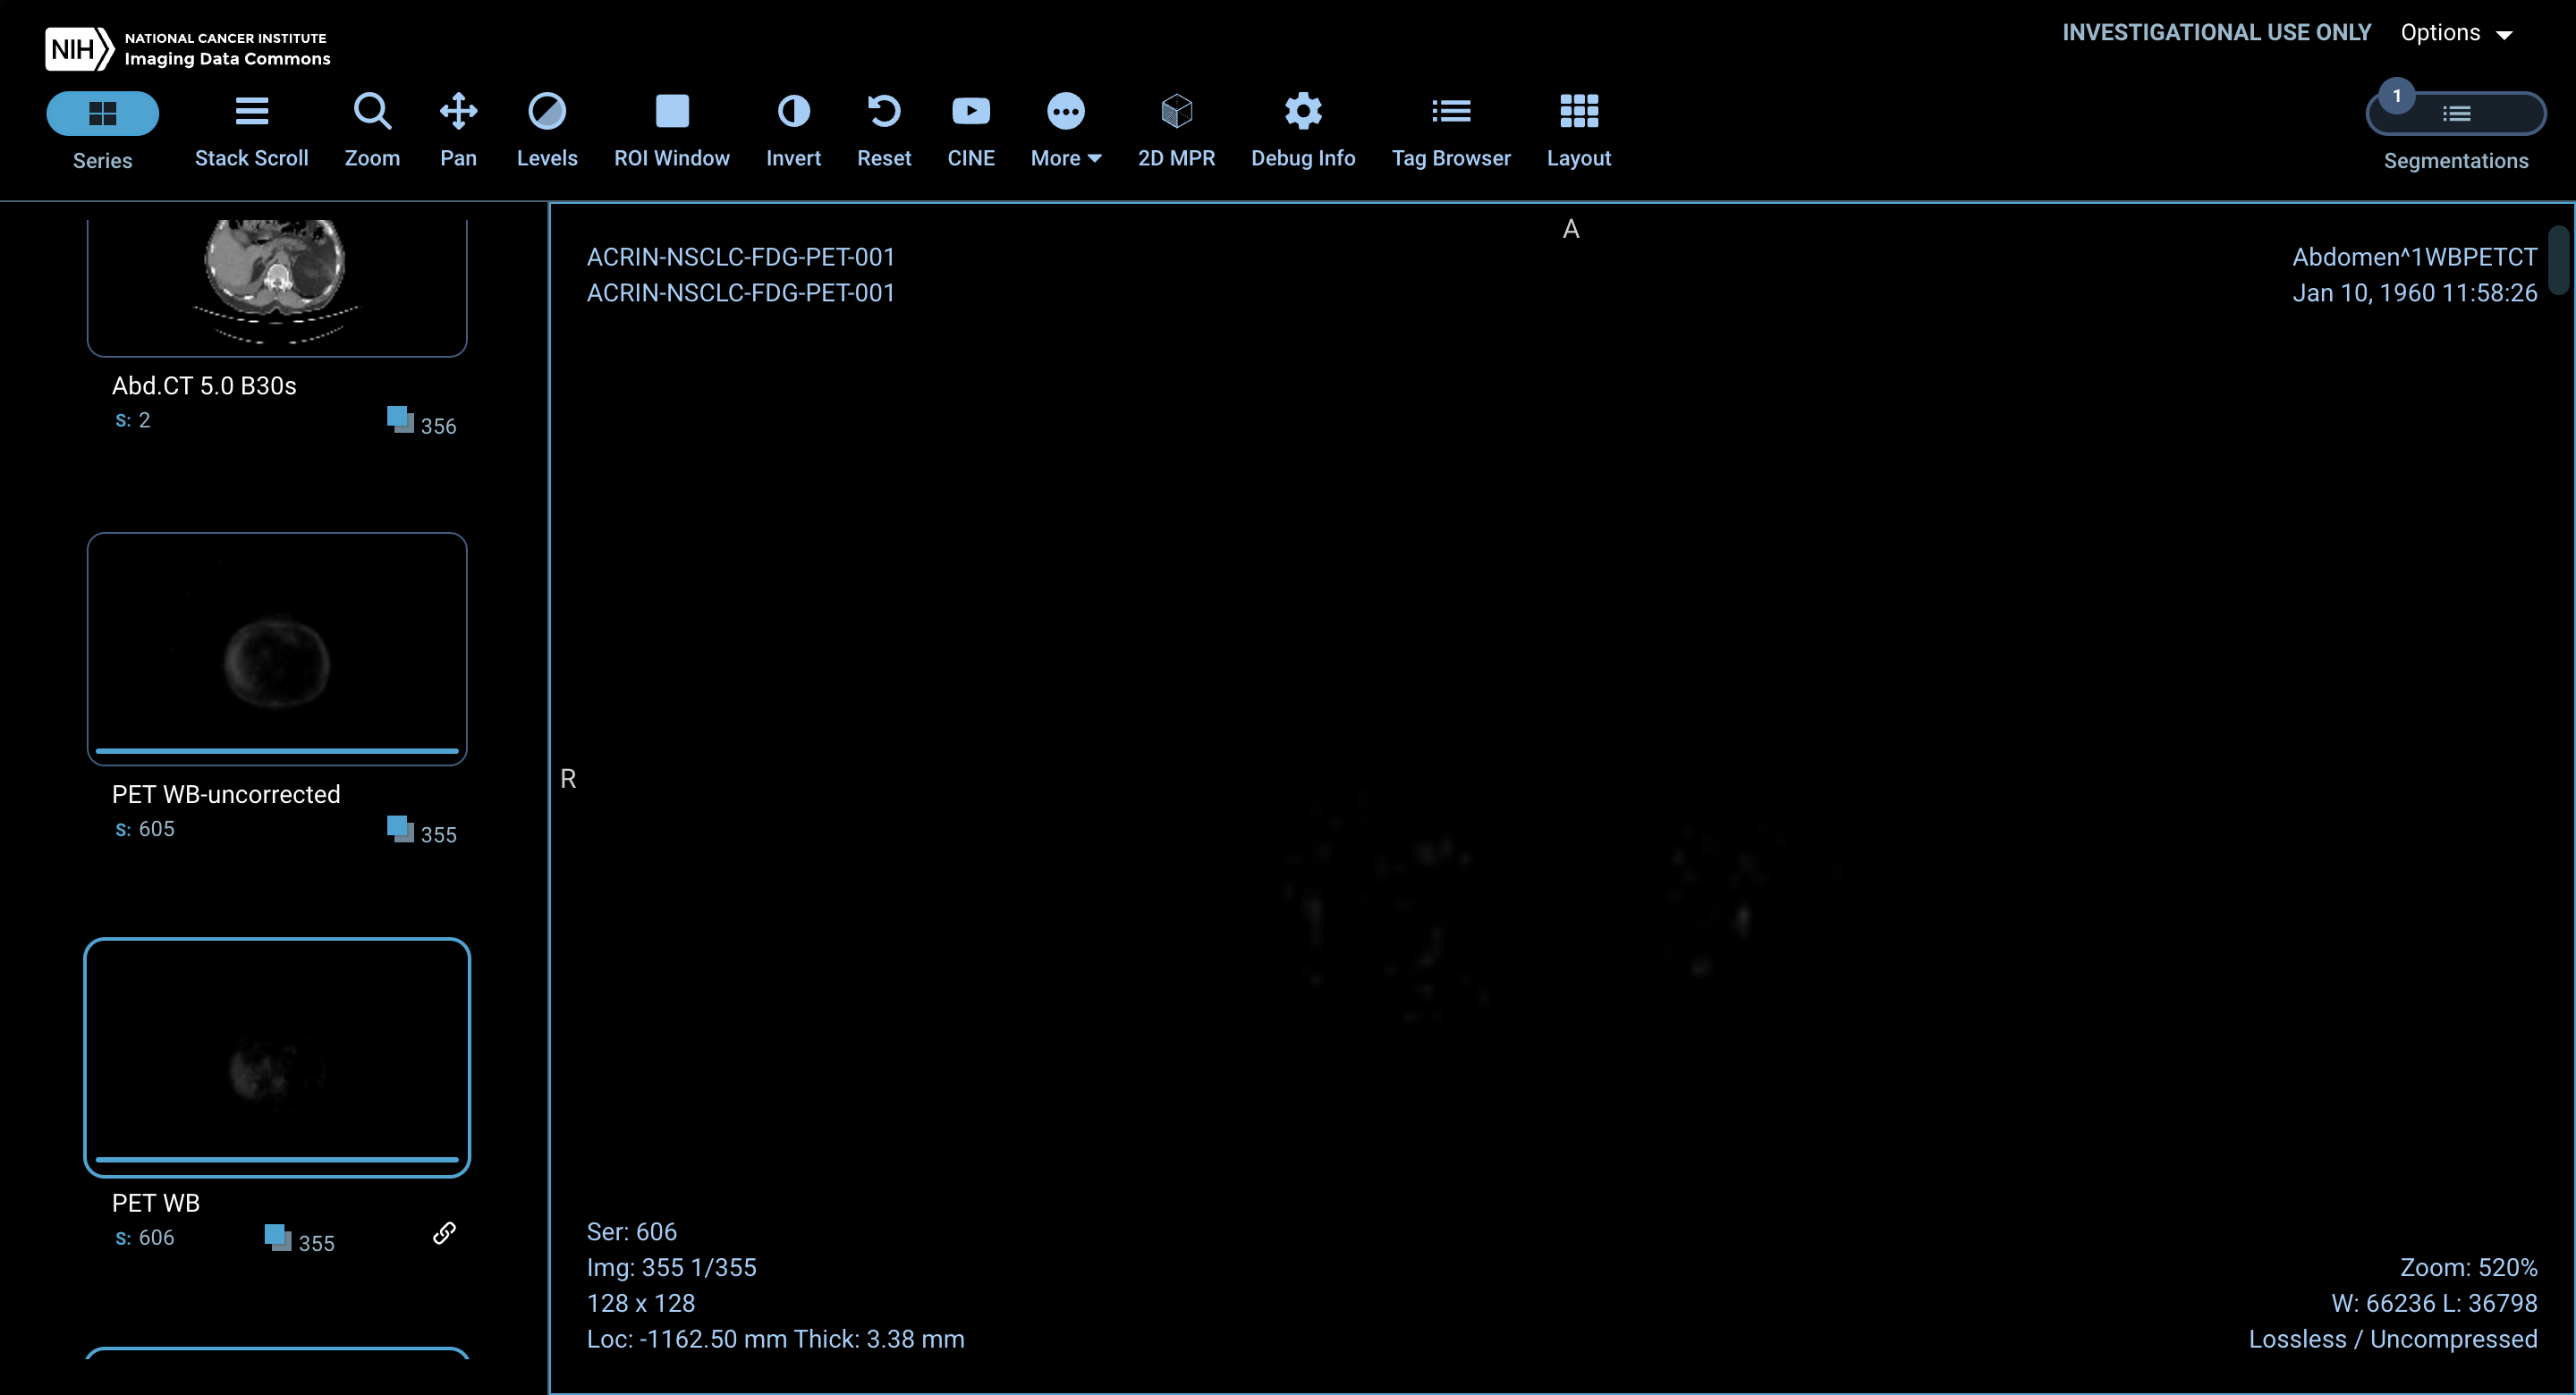

**Task 2**: Now, we will install and run the Sobel Boostlet! [15 Points]

In [9]:
# 1) In a different tab, go to https://Boostlet.org and drag the Sobel
# boostlet into your bookmarks toolbar.

In [10]:
# 2) Then, switch back to the IDC tab from Task 1 and run the Sobel Boostlet
# by clicking on it!

In [11]:
# 3) Paste a screenshot showing the filtered image.

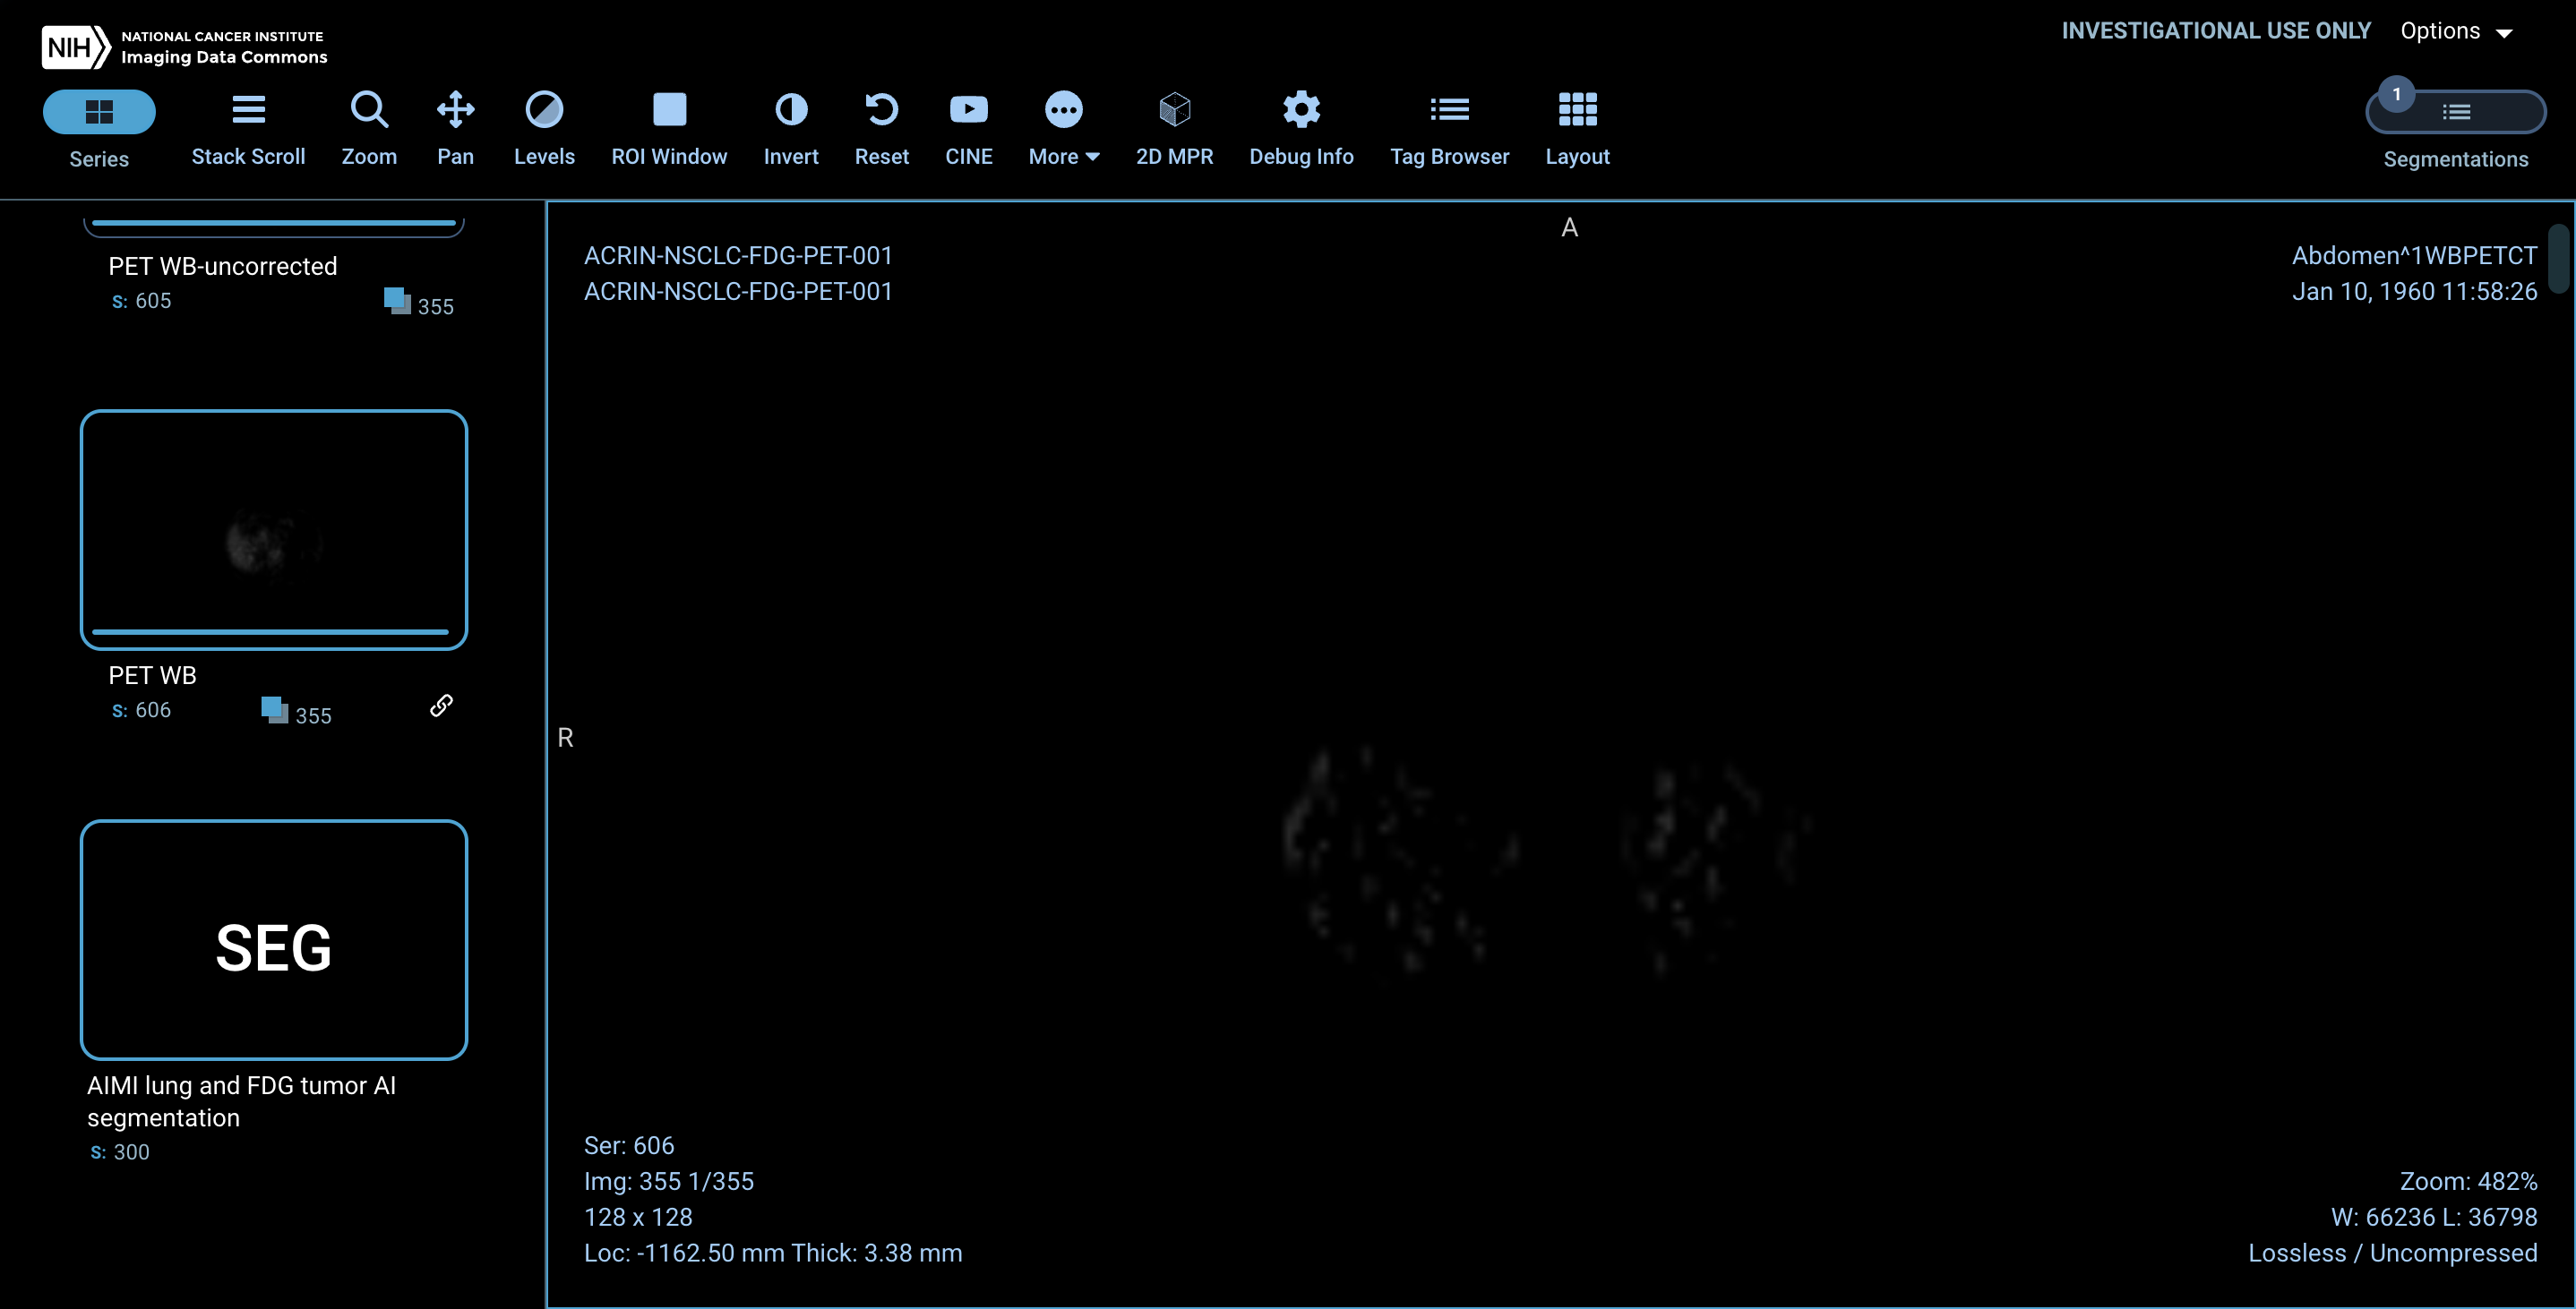TODO: Add your screenshot showing filtered image.

In [12]:
# 4) Study the source code of the Sobel Boostlet:
# https://github.com/mpsych/boostlet/blob/main/examples/sobel.js

In [13]:
# 5) Please describe when the run() is called and what it does.

# The run() function initializes the Boostlet framework, retrieves an image, applies a Sobel filter to detect edges in the image, and then renders the filtered image back using the Boostlet framework.

**Task 3**: Let's access the pixel data using the Boostlet API! [20 Points]

In [14]:
#
# We will now use the Boostlet API to modify the pixel data
# from the IDC viewer.
#
# IMPORTANT: RELOAD THE PAGE TO CLEAR THE SOBEL FROM BEFORE!
#
# For this, please open the Developer Tools of your browser. Specifically,
# the JavaScript console.
#
# Paste and execute the following JavaScript code:
#
'''

script = document.createElement("script");
script.type = "text/javascript";
script.src = "https://boostlet.org/dist/boostlet.min.js";
document.head.appendChild(script);
eval(script);

'''
#
#
# Now, you will have access to the Boostlet API.
#
#
#
# The following method initializes the Boostlet methods.
#
'''
Boostlet.init()
'''
#
# It should with something like
#   Found $febea0d4681e2ae0$export$1ec7e9f19103cb25 {name: 'cornerstone2D',...
#
# This means, the Boostlet API detected cornerstone2D and is ready to rock!
#

'\nBoostlet.init()\n'

In [15]:
# Found $febea0d4681e2ae0$export$1ec7e9f19103cb25 {name: 'cornerstone2D', instance: {…}, flip_on_png: false, canvasFallback: $0fabd2f4a96087f5$export$48eecc33595f906d, cornerstonetools_instance: {…}}

In [16]:
#
# The following code will grab the pixels of the current slice.
#
'''

image = Boostlet.get_image();
pixels = image.data;

'''

'\n\nimage = Boostlet.get_image();\npixels = image.data;\n\n'

In [17]:
# TODO: What is the maximum pixel value of the current slice?
#
# Hint: There are multiple ways of doing this according to
# https://medium.com/coding-at-dawn/the-fastest-way-to-find-minimum-and-maximum-values-in-an-array-in-javascript-2511115f8621
#

In [1]:
#
#
'''



 Math.max(...pixels)




'''
#
#

'\n\n\n\n Math.max(...pixels)\n\n\n\n\n'

In [2]:
# TODO: MAXIMUM VALUE OF THE SLICE
# 1360

**Task 4**: Let's implement thresholding! [30 Points]

In [18]:
# Write JavaScript code that sets all pixels to zero that are outside
# of the following range
#
# everything < 0.5 * MAX_VALUE
# everything > 0.8 * MAX_VALUE
#

In [19]:
#
#
'''



// TODO: YOUR CODE GOES HERE
for (let i = 0; i < pixels.length; i++) {
    if (pixels[i] < 0.5 * MAX_VALUE || pixels[i] > 0.8 * MAX_VALUE) {
        pixels[i] = 0;
    }
}



'''
#
#

'\n\n\n\n// TODO: YOUR CODE GOES HERE\nfor (let i = 0; i < pixels.length; i++) {\n    if (pixels[i] < 0.5 * MAX_VALUE || pixels[i] > 0.8 * MAX_VALUE) {\n        pixels[i] = 0;\n    }\n}\n\n\n\n'

In [20]:
# After thresholding, call
#
'''
  Boostlet.set_image(pixels);
'''
#
# to update the current slice, then take a screenshot!
#

'\n  Boostlet.set_image(pixels);\n'

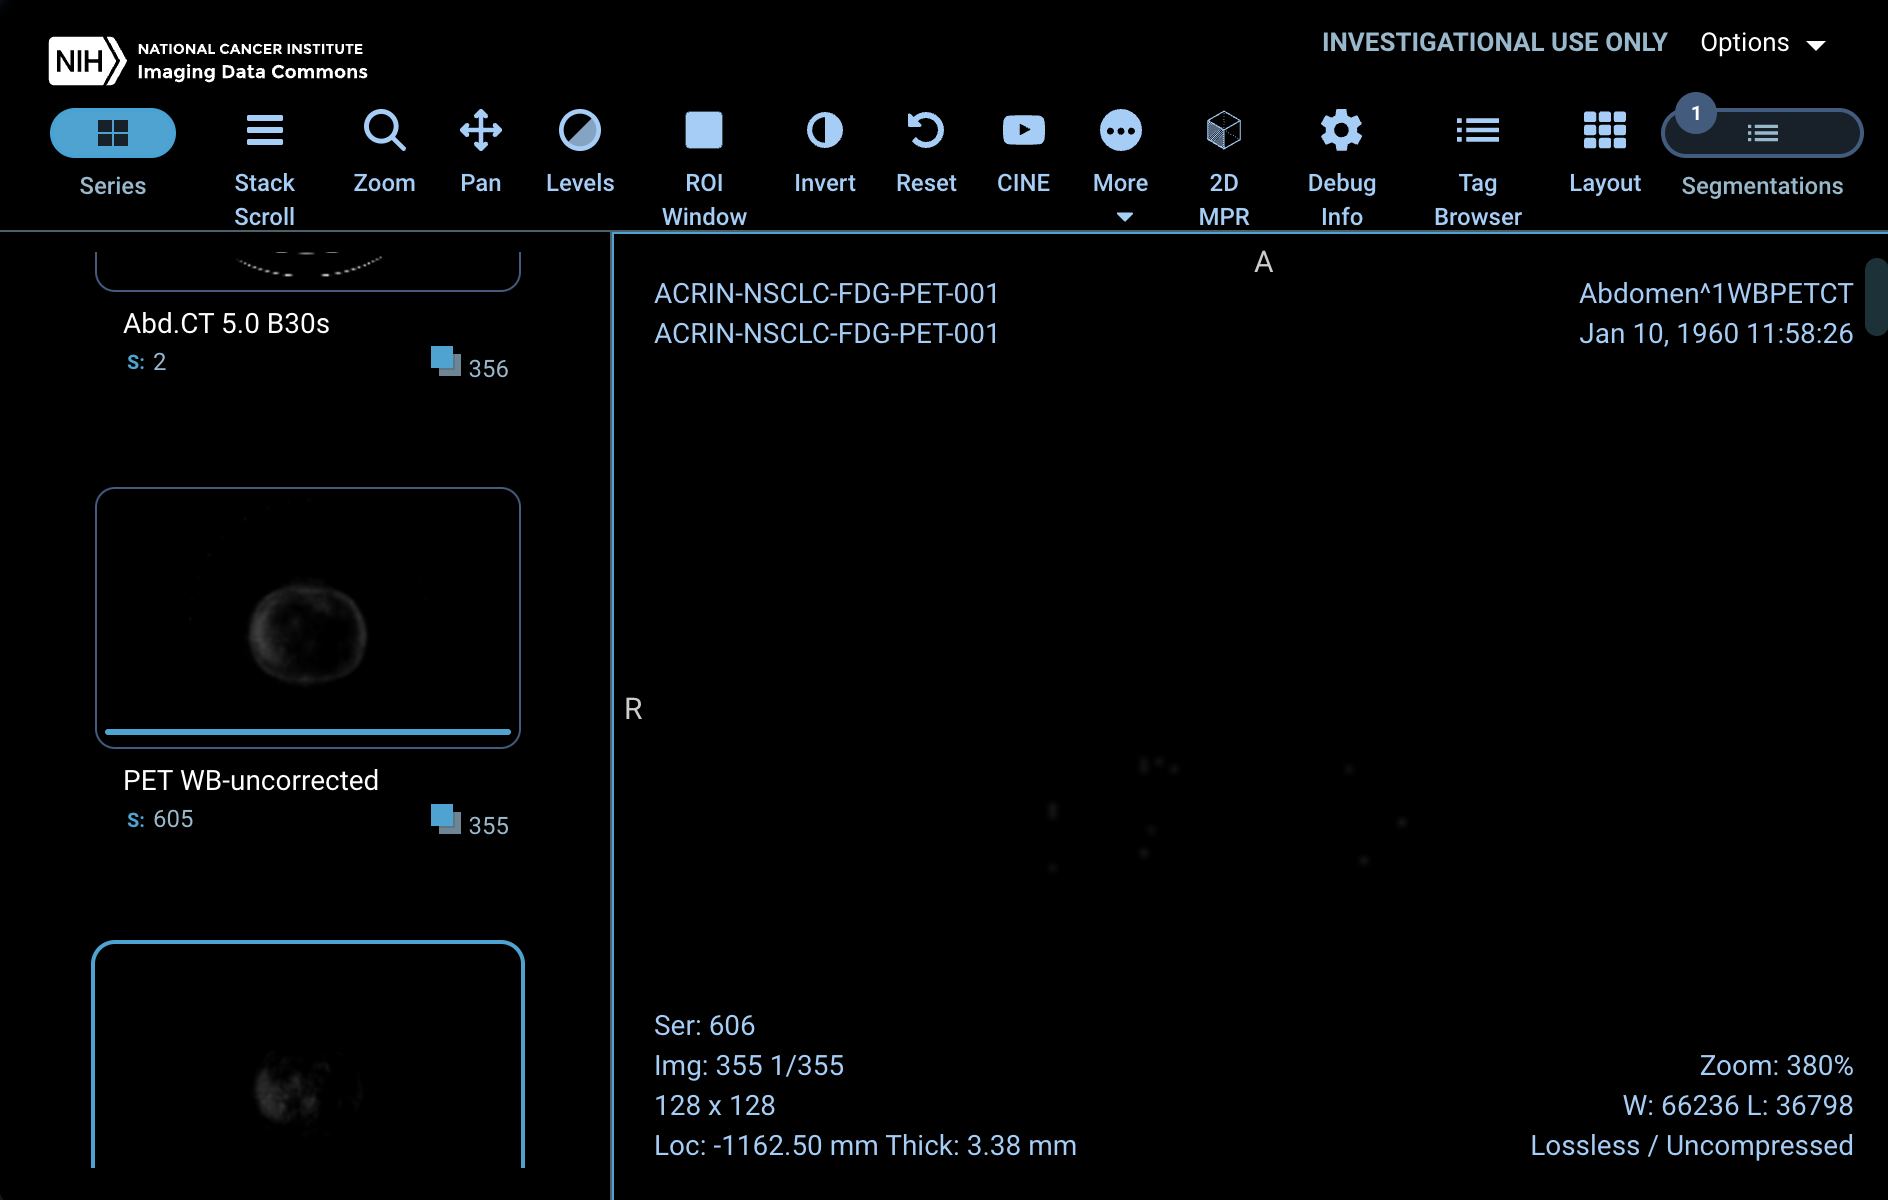

**Task 5**: Refactor your code to match the following structure. [20 Points]

In [21]:
#
#
#
'''

script = document.createElement("script");
script.type = "text/javascript";
script.src = "https://boostlet.org/dist/boostlet.min.js";

script.onload = run;
document.head.appendChild(script);
eval(script);

function run() {

  Boostlet.init();

  image = Boostlet.get_image();

  max_value = find_max_value( image.data );

  thresholded = threshold( image.data, 0.5 * max_value, 0.8 * max_value );

  Boostlet.set_image( thresholded );

}

function find_max_value( pixels ) {

  return Math.max(...pixels);

}

function threshold( pixels, lower, upper ) {

  for (let i = 0; i < pixels.length; i++) {
    if (pixels[i] < lower || pixels[i] > upper) {
        pixels[i] = 0;
    }
  }
  return pixels;

}

'''
#
#
#

'\n\nscript = document.createElement("script");\nscript.type = "text/javascript";\nscript.src = "https://boostlet.org/dist/boostlet.min.js";\n\nscript.onload = run;\ndocument.head.appendChild(script);\neval(script);\n\nfunction run() {\n\n  Boostlet.init();\n\n  image = Boostlet.get_image();\n\n  max_value = find_max_value( image.data );\n\n  thresholded = threshold( image.data, 0.5 * max_value, 0.8 * max_value );\n\n  Boostlet.set_image( thresholded );\n\n}\n\nfunction find_max_value( pixels ) {\n\n  return Math.max(...pixels);\n\n}\n\nfunction threshold( pixels, lower, upper ) {\n\n  for (let i = 0; i < pixels.length; i++) {\n    if (pixels[i] < lower || pixels[i] > upper) {\n        pixels[i] = 0;\n    }\n  }\n  return pixels;\n\n}\n\n'

In [22]:
#
# Finally, please verify that copy and pasting the code above into the JS console
# runs properly, and then use https://caiorss.github.io/bookmarklet-maker/ to create a
# bookmarklet and test it!
#
# TODO: Screenshot the bookmarklet creator website after you ran it!
#

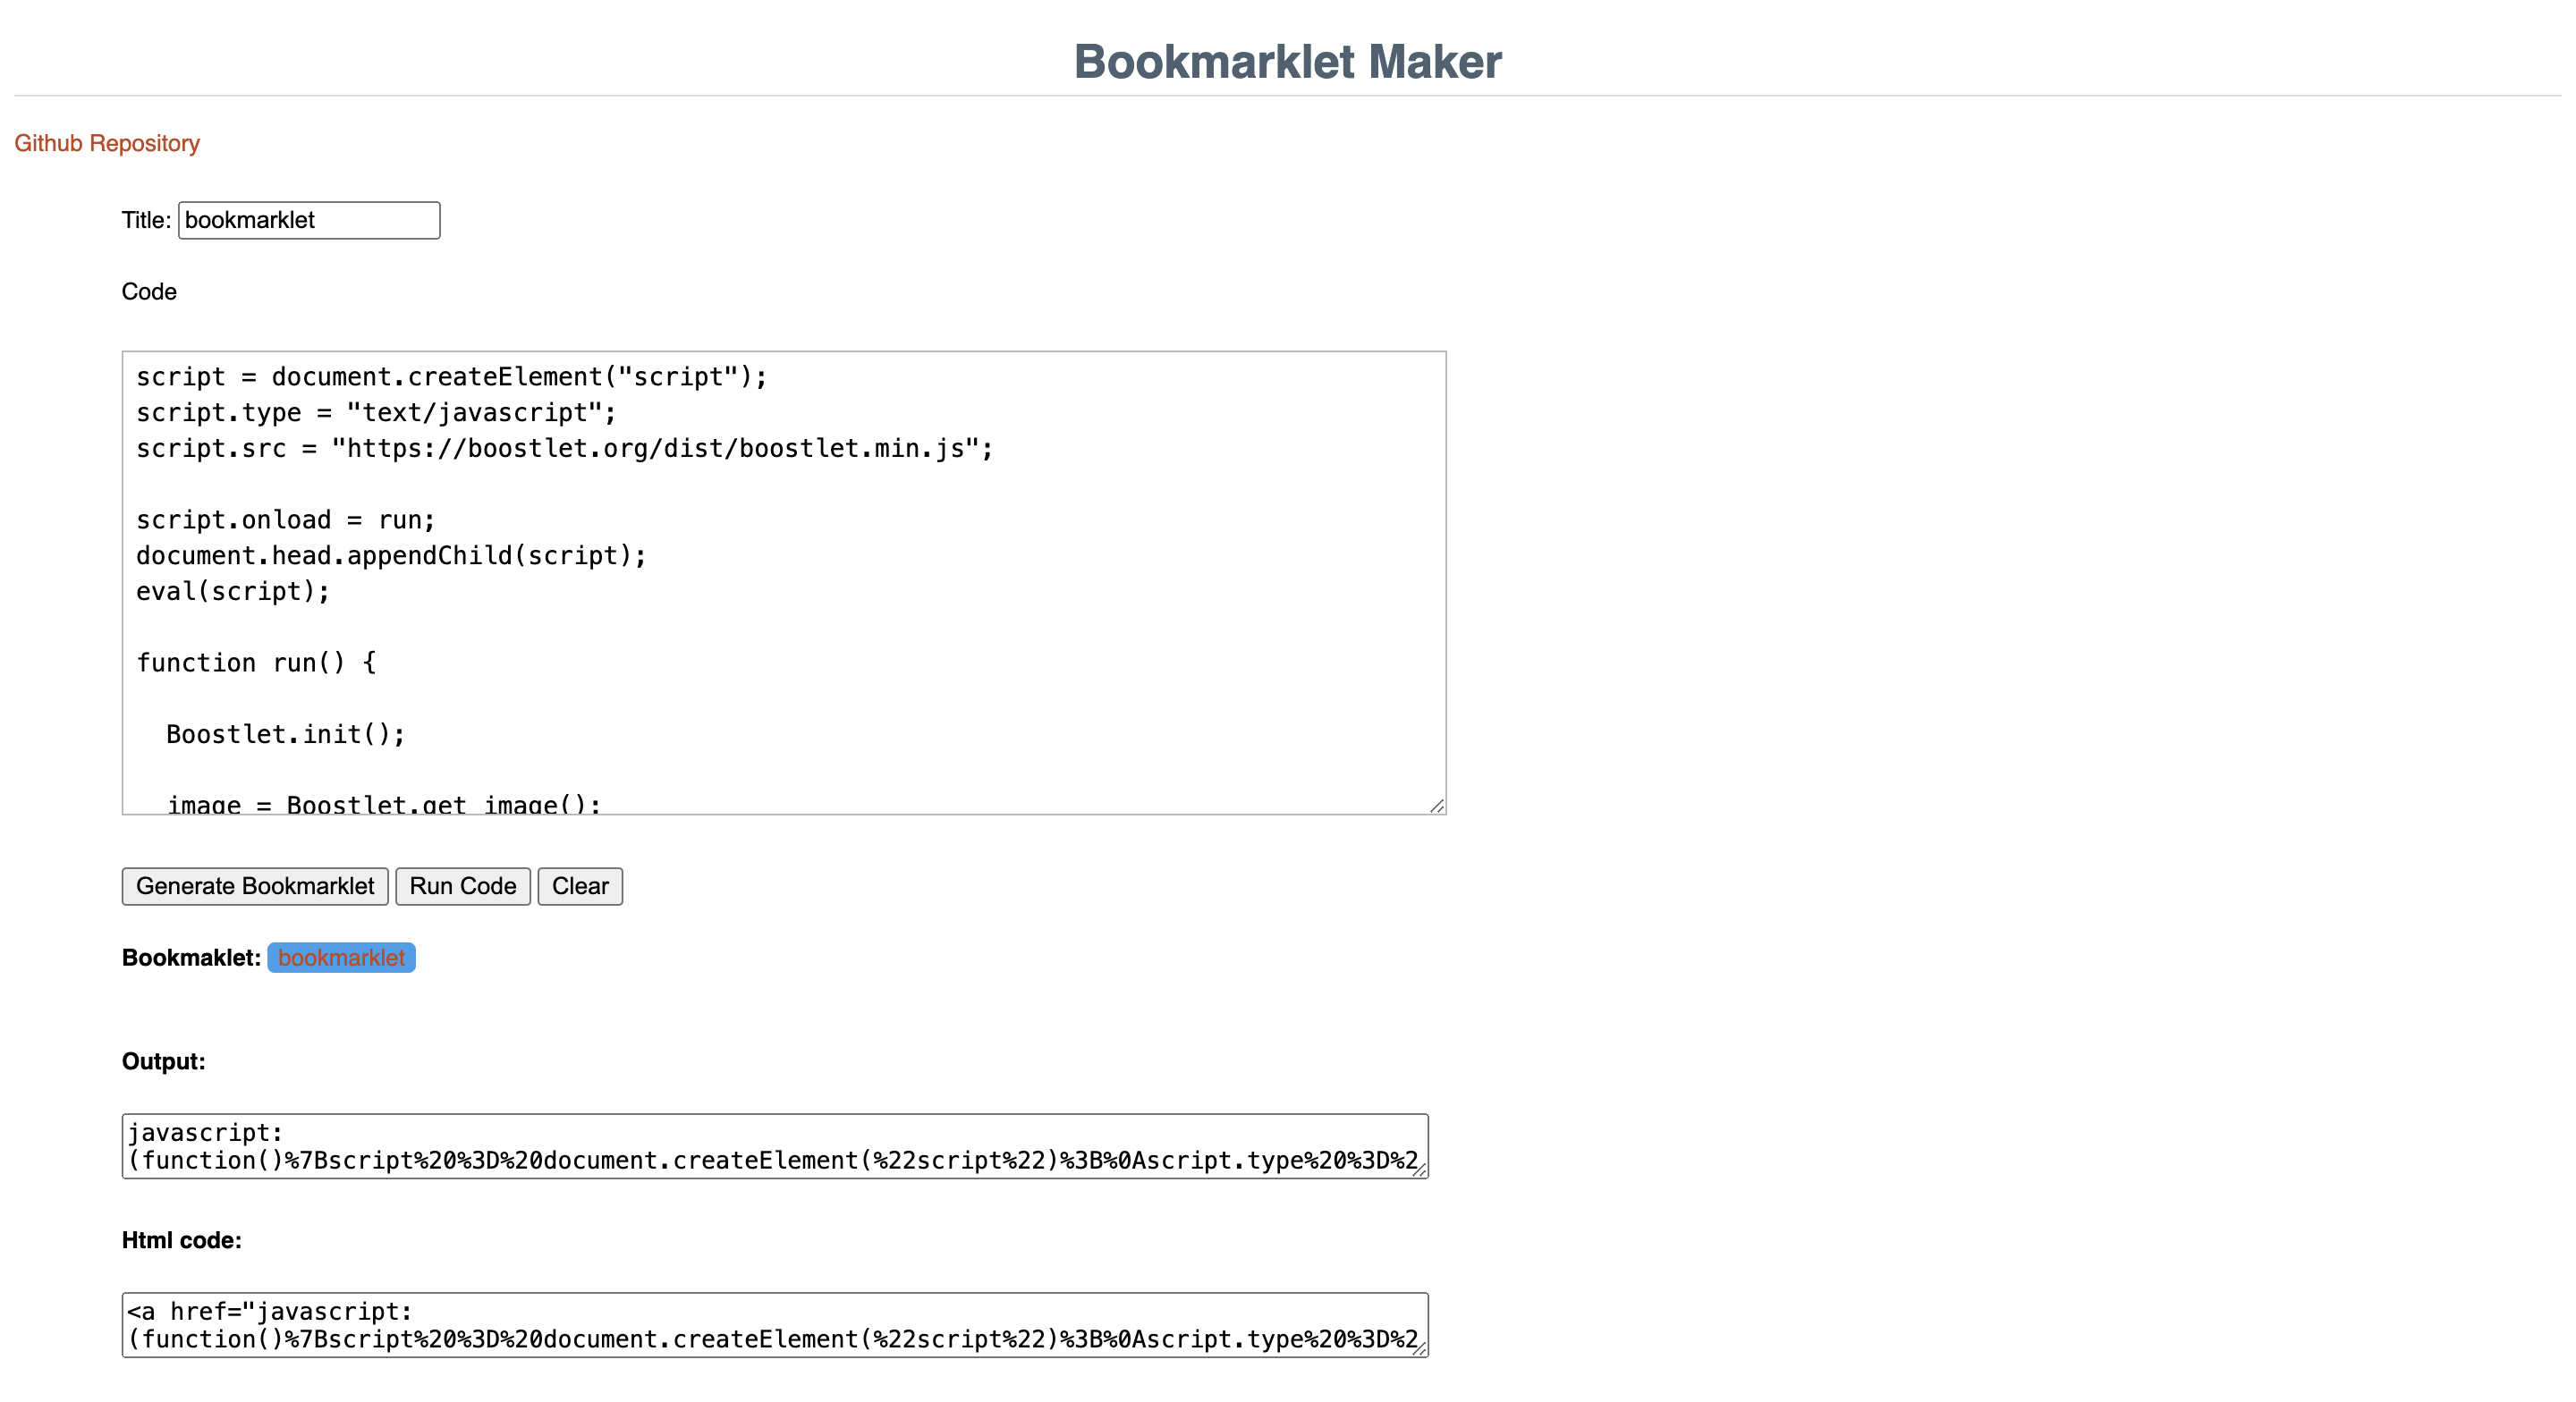TODO: Add Screenshot of the Bookmarklet Maker showing your code.

**Bonus**: Create a Boostlet that shows a slider UI to perform thresholding. [33 Points]

In [23]:
#
# For the bonus, please get inspired by the Plotly Histogram Boostlet that
# creates a UI with a <div>: https://github.com/mpsych/boostlet/blob/main/examples/plotly.js
# or the TRAKO Boostlet: https://github.com/mpsych/boostlet/blob/main/examples/trako.js
#

In [24]:
#
# The UI should pop up whenever the user clicks on your bookmarklet and then shows
# a slider that directly controls the thresholding of the IDC viewer.
#
# HINT: two seperate sliders for min and max are fine but this one would be better:
# https://medium.com/@predragdavidovic10/native-dual-range-slider-html-css-javascript-91e778134816
#
# The slider min and max values should be propagated based on the current slice.
#  Once the user modifies the slider, the threshold should update.
#
# HINT: Please store the original pixels so you can threshold without losing the
# original information and reset the view.
#

In [25]:
# TODO: Finish the code below.
#
'''

script = document.createElement("script");
script.type = "text/javascript";
script.src = "https://boostlet.org/dist/boostlet.min.js";

script.onload = run;
document.head.appendChild(script);
eval(script);

function run() {

  Boostlet.init();

  image = Boostlet.get_image();

  min_value = find_min_value( image.data );
  max_value = find_max_value( image.data );

  show_slider(min_value, max_value, function() {

    // callback to execute when slider moves
    thresholded = threshold( image.data, slider_min, slider_max );

    Boostlet.set_image( thresholded );

  });

}

function find_max_value( pixels ) {

  return Math.max(...pixels);

}

function find_min_value( pixels ) {

  return Math.min(...pixels);

}

function threshold( pixels, lower, upper ) {

  for (let i = 0; i < pixels.length; i++) {
    if (pixels[i] < lower || pixels[i] > upper) {
        pixels[i] = 0;
    }
  }
  return pixels;

}

function show_slider(min_value, max_value, callback) {
  let sliderDiv = document.createElement("div");
  sliderDiv.id = "threshold-slider";
  let minSlider = document.createElement("input");
  let maxSlider = document.createElement("input");


  minSlider.type = "range";
  minSlider.min = 0;
  minSlider.max = max_value;
  minSlider.value = min_value;
  minSlider.step = 1;
  minSlider.id = "min-slider";


  maxSlider.type = "range";
  maxSlider.min = min_value;
  maxSlider.max = max_value;
  maxSlider.value = max_value;
  maxSlider.step = 1;
  maxSlider.id = "max-slider";


  sliderDiv.appendChild(minSlider);
  sliderDiv.appendChild(maxSlider);


  document.body.appendChild(sliderDiv);


  minSlider.addEventListener("input", function() {
    let minVal = parseInt(minSlider.value);
    let maxVal = parseInt(maxSlider.value);
    callback(minVal, maxVal);
  });

  maxSlider.addEventListener("input", function() {
    let minVal = parseInt(minSlider.value);
    let maxVal = parseInt(maxSlider.value);
    callback(minVal, maxVal);
  });
}




'''
#
#

'\n\nscript = document.createElement("script");\nscript.type = "text/javascript";\nscript.src = "https://boostlet.org/dist/boostlet.min.js";\n\nscript.onload = run;\ndocument.head.appendChild(script);\neval(script);\n\nfunction run() {\n\n  Boostlet.init();\n\n  image = Boostlet.get_image();\n\n  min_value = find_min_value( image.data );\n  max_value = find_max_value( image.data );\n\n  show_slider(min_value, max_value, function() {\n\n    // callback to execute when slider moves\n    thresholded = threshold( image.data, slider_min, slider_max );\n\n    Boostlet.set_image( thresholded );\n\n  });\n\n}\n\nfunction find_max_value( pixels ) {\n\n  return Math.max(...pixels);\n\n}\n\nfunction find_min_value( pixels ) {\n\n  return Math.min(...pixels);\n\n}\n\nfunction threshold( pixels, lower, upper ) {\n\n  for (let i = 0; i < pixels.length; i++) {\n    if (pixels[i] < lower || pixels[i] > upper) {\n        pixels[i] = 0;\n    }\n  }\n  return pixels;\n\n}\n\nfunction show_slider(min_valu

In [ ]:
#
# THANK YOU!!!
#
#       .--..--..--..--..--..--.
#     .' \  (`._   (_)     _   \
#   .'    |  '._)         (_)  |
#   \ _.')\      .----..---.   /
#   |(_.'  |    /    .-\-.  \  |
#   \     0|    |   ( O| O) | o|
#    |  _  |  .--.____.'._.-.  |
#    \ (_) | o         -` .-`  |
#     |    \   |`-._ _ _ _ _\ /
#     \    |   |  `. |_||_|   |
#     | o  |    \_      \     |     -.   .-.
#     |.-.  \     `--..-'   O |     `.`-' .'
#   _.'  .' |     `-.-'      /-.__   ' .-'
# .' `-.` '.|='=.='=.='=.='=|._/_ `-'.'
# `-._  `.  |________/\_____|    `-.'
#    .'   ).| '=' '='\/ '=' |
#    `._.`  '---------------'
#            //___\   //___\
#              ||       ||
#     LGB      ||_.-.   ||_.-.
#             (_.--__) (_.--__)
#
#